In [284]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pyfuncs import text_funcs
import seaborn as sns

In [285]:
Xy = pd.read_pickle('laptop_Xy.pkl')
X, y = Xy.iloc[:, 1:], Xy['review_ratings'] #tfidf vectorized corpus

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [287]:
corpus_df = pd.read_pickle('laptop_corpus_df.pkl')
corpus = corpus_df['review'] # single col = text, row = revie

In [288]:
corpus_train = corpus.iloc[X_train.index]
corpus_test = corpus.iloc[X_test.index]

The simplest way that I could tag the sentiment of a review is just by looking at the review rating (out of 5 stars). 
1. positive = 4,5
2. negative = 1,2
3. neutral = 3

In [289]:
sentiment = text_funcs.get_pos_neg_neut(y_train)
#lets take a look at some positive, negative and neutral reviews:
sent = pd.Series(sentiment)
#index got reset with get_pos_neg_neut(), will set index back to train index
sent.reset_index(drop=True, inplace=True)
corpus_train.reset_index(drop=True, inplace=True)
X_sent = pd.concat([sent, corpus_train], axis=1)
X_sent.index = [X_train.index]

In [290]:
pd.set_option('display.max_colwidth', 2000)
(X_sent.groupby(X_sent.columns[0])
     .head(3).sort_values(X_sent.columns[0]))

,0,review
147,-1,screen randomly goes black after price and specs of powerhouse i the rog zephyrus thinking it was the best bang for the buck my main use for the notebook was for photographic image and blender modeling no gaming upon arrival i made sure all the were the first day the notebook as strong that night i was extremely disappointed that the back light on the keyboard made reading the nearly impossible i read in a couple that the back light was bad but they should have been more honest the back light glare seeing the near impossible i like to listen to music while i process but i never could get the speaker volume to preform as moving the sound volume slider up i did not hear the chime until the level was at and level like level on most other only work around is to adjust the custom setting to their highest but that added distortion the next day is when the real problem first few times that the screen went blank i thought that it must have gone into sleep mode except the notebook would not just wake back up i press and hold the power button about a minute to get the screen back yesterday i made sure that all the were up to date i ran the in administrator mode then i a grant access to change the computer each time i the notebook after doing a clean recovery install of i support they advised me to use the task manager to change one of the to run as administrator the rog zephyrus is a powerhouse that ran blender well and batch of large raw camera with ease however the screen going blank combined with the atrocious back light on the keyboard on top of the poor sound quality all added up to be a deal breaker so i returned the rog zephyrus not sure i will ever buy another product again
409,-1,repeated unfixable and hardware i this several ago and the premium warranty every year within my charger port stopped working dell it within a few more the charger port stopped working dell it several ago the making intermittent crackling to the point where i cannot watch a minute video or listen to music without needing to restart my every time the sound again under my warranty i tried to have this dell ran diagnostics and have now given up on trying to resolve the problem despite the fact that i for warranty i the battery as well several ago which i understand as are a consumable product but now my computer wont charge regardless i now need to spend over to replace a computer that is only a few old and should not have the end of its yet
437,-1,beware beware my computer came in with someone else ’ s already set up on the device i over the description very carefully and i did not see a single mention of this being a used or device it came to me with a return address i thought i was this new from the worst part was when i logged into my account it no in the last six very upset that i spent on a computer that is not at all what was i can only hope i will be able to have a smooth return
142,0,the that caught everyone eye this while being great on paper and a great exterior is plagued by a lot of the screen randomly just turns off and can only be fixed with a reset while gaming the extremely hot to the touch hot enough when touching for a second can burn you but can be by around with hidden deep in the the battery life can be as above average at best i have had to go to for help with the to help disable some and update these combined make me question my purchase and if they continue to persist i may return the device for spending a grand and a half this may not be the way to go for the average who dont want to bother with to update to fix and to deal with mediocre i tried to like this device i really have the is built well with little to no flex in the the keyboard a nice experience and the is very powerful while also being very efficient the q can easily hit on most on low to medium the display is clear and get fairly bright overall this would be a to without the keep in mind that i am not that well educated in the technology scene so tak

This seems pretty reasonable, but let's now try to use vader sentiment analysis instead of just looking at the review ratings.

In [291]:
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#takes a string and returns 4 categories, pos, neg, neut, compund
sid = SentimentIntensityAnalyzer()
pd.set_option('display.max_colwidth', 70)


In [292]:
sid.polarity_scores(corpus[0])

{'neg': 0.044, 'neu': 0.789, 'pos': 0.167, 'compound': 0.9604}

In [293]:
corpus[0]

'almost a home run but pretty decent full disclosure only used the new on and off for about a week from a the good the screen the is wonderful although just a bit bigger than my between the slightly higher resolution a bit more real estate and stellar colors it is the best display experience so far power the short work of everything thrown at this so far my would be spinning its like it was about to take off whereas this one is barely the i havent been able to push it to past utilization yet the i thought the sized might be a problem potentially unwanted from my palm resting on it while but i have to say more'

In [294]:
y[0]

'4'

In [295]:
def get_polarity_score(index, corpus, y):
    score = sid.polarity_scores(corpus[index])
    return score, y[index], corpus[index]

In [296]:
get_polarity_score(200, corpus, y)

({'neg': 0.105, 'neu': 0.701, 'pos': 0.194, 'compound': 0.9268},
 '2',
 'warning out of warranty support theres no doubt about it that this is a beautiful device the keyboard is wonderful but finger grease pretty easily the screen is decent with good but not very vibrant and the is buttery smooth but finesse and like integration with local very lightweight and compact i can see myself taking this everywhere with me also battery is not quite as but this is typical of all the major however the one issue that no one to be talking about is the lack of repair once the warranty with a device this portable will happen and unless you cash in on an extended warranty this might become a paperweight like the original more')

In [297]:
get_polarity_score(300, corpus, y)

({'neg': 0.062, 'neu': 0.759, 'pos': 0.179, 'compound': 0.9775},
 '3',
 'good computer loud fan i havent had this for long but it definitely its purpose its pretty fast it amazing graphics and relatively smoothly however i do have some with this particular the biggest problem for me is the fan is so loud it only for a few at a time but the noise is ridiculously loud for a computer that is doing no more than running chrome and a few other its loud enough that gotten in various classes that used this in tried looking but i could not find any kind of fan control in the another issue i have is the pen i love a pen to use alongside the touch screen for drawing and taking but in general its most other surface seem to have an eraser button at the top of the pen which can be used for many however this pen such a button it does have two buttons towards the tip around where the index finger generally however these buttons are disappointingly not at all overall this is a good computer however i f

In [298]:
get_polarity_score(50, corpus, y)

({'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.9829},
 '5',
 'great is why i continually purchase as always another great from apple i have now in addition to a few they are always great and i cant recall any major that i have had with any of them if you are looking for a great and speedy for more simpler such as to browsing the web then this is a great product if looking to do more such as then id recommend the hitter brother the pro so nice that apple finally decided to increase the on their beginning by doubling the entry level capacity from to i typically purchase the capacity so from to was a pleasant and change i would definitely recommend anyone that is on the edge of making decision to buy this if your needs fall into the description i above are always a tad bit on the expensive end of the spectrum but the upside to that is that their resale value to hold very well if you take care of them the last one i just and then sold air version i ended up selling for around')

After playing around measuring the sentiment scores on each review, I noticed two things. First, the sentiment seems to be more sensitive to positive reviews than negative. Second, the polarity scores don't seem to be correlated with review stars, but I'll take a more quantitative look at that.

In [299]:
type(corpus)

pandas.core.series.Series

In [300]:
corpus_polarity = pd.DataFrame(corpus_df[['review', 'review_ratings']])
corpus_polarity['polarity'] = corpus_polarity['review'].apply(lambda review:
          sid.polarity_scores(review))
corpus_polarity.head()

,review,review_ratings,polarity
0,almost a home run but pretty decent full disclosure only used the ...,4,"{'neg': 0.044, 'neu': 0.789, 'pos': 0.167, 'compound': 0.9604}"
1,this is the latest i bought the pro inch on which by now i have th...,5,"{'neg': 0.023, 'neu': 0.886, 'pos': 0.091, 'compound': 0.9907}"
2,from my pro to this base model so this is really a big jump the sc...,4,"{'neg': 0.013, 'neu': 0.871, 'pos': 0.116, 'compound': 0.978}"
3,pro great upgrade from late from my pro late ram to this model ove...,5,"{'neg': 0.037, 'neu': 0.765, 'pos': 0.198, 'compound': 0.9981}"
4,finally an improvement over my and returned a couple of these over...,4,"{'neg': 0.06, 'neu': 0.754, 'pos': 0.187, 'compound': 0.9963}"


In [301]:
corpus_polarity['compound'] = corpus_polarity['polarity'].apply(lambda score_dict:
       score_dict['compound'])
corpus_polarity['pos'] = corpus_polarity['polarity'].apply(lambda score_dict:
       score_dict['pos'])
corpus_polarity['neg'] = corpus_polarity['polarity'].apply(lambda score_dict:
       score_dict['neg'])
corpus_polarity['neu'] = corpus_polarity['polarity'].apply(lambda score_dict:
       score_dict['neu'])
corpus_polarity.drop('polarity', axis=1, inplace=True, errors='ignore')
corpus_polarity.head()

,review,review_ratings,compound,pos,neg,neu
0,almost a home run but pretty decent full disclosure only used the ...,4,0.9604,0.167,0.044,0.789
1,this is the latest i bought the pro inch on which by now i have th...,5,0.9907,0.091,0.023,0.886
2,from my pro to this base model so this is really a big jump the sc...,4,0.9780,0.116,0.013,0.871
3,pro great upgrade from late from my pro late ram to this model ove...,5,0.9981,0.198,0.037,0.765
4,finally an improvement over my and returned a couple of these over...,4,0.9963,0.187,0.060,0.754


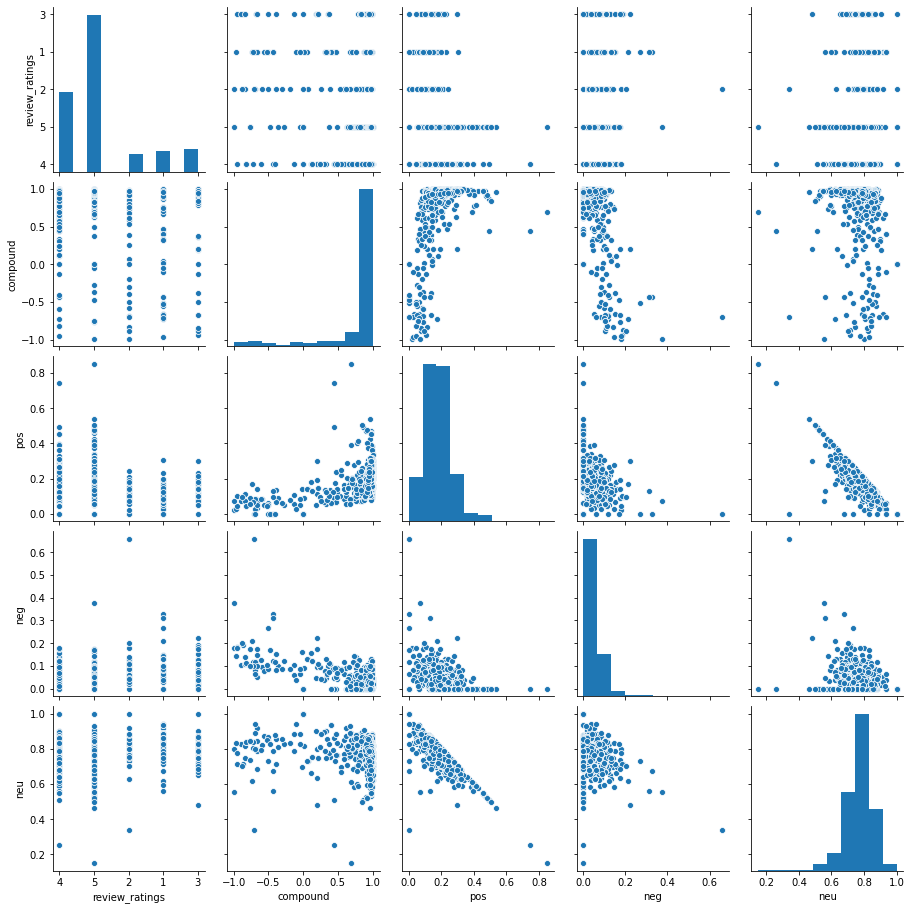

In [266]:
sns.pairplot(corpus_polarity)

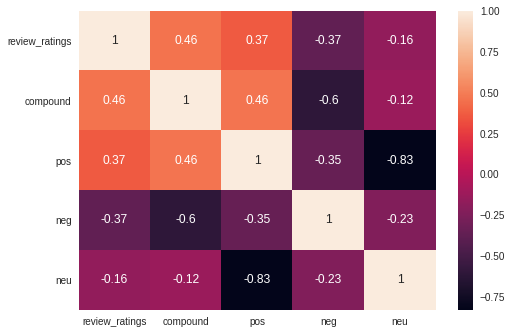

In [302]:
corpus_polarity['review_ratings'] = corpus_polarity.review_ratings.astype(int)
corrs = corpus_polarity.corr()
sns.heatmap(corrs, annot=True)

In [303]:
corpus_polarity.head()
corpus_polarity['prediction'] = np.where(corpus_polarity.pos > corpus_polarity.neg, 1, -1)

In [304]:
corpus_polarity['ratings'] = text_funcs.get_pos_neg_neut(corpus_polarity.review_ratings, 
                                                         neutral_class=False)

In [305]:
corpus_polarity.head()

,review,review_ratings,compound,pos,neg,neu,prediction,ratings
0,almost a home run but pretty decent full disclosure only used the ...,4,0.9604,0.167,0.044,0.789,1,1
1,this is the latest i bought the pro inch on which by now i have th...,5,0.9907,0.091,0.023,0.886,1,1
2,from my pro to this base model so this is really a big jump the sc...,4,0.9780,0.116,0.013,0.871,1,1
3,pro great upgrade from late from my pro late ram to this model ove...,5,0.9981,0.198,0.037,0.765,1,1
4,finally an improvement over my and returned a couple of these over...,4,0.9963,0.187,0.060,0.754,1,1


In [327]:
from sklearn.metrics import confusion_matrix
y_true = corpus_polarity.ratings
y_pred = corpus_polarity.prediction
cf = confusion_matrix(y_true, y_pred)

In [328]:
cf

array([[ 36,  88],
       [ 23, 453]])

In [329]:
any(corpus_polarity.prediction.isnull())

False

In [330]:
corpus_polarity.prediction.value_counts()

 1    541
-1     59
Name: prediction, dtype: int64

In [331]:
corpus_polarity.ratings.value_counts()

 1    476
-1    124
Name: ratings, dtype: int64

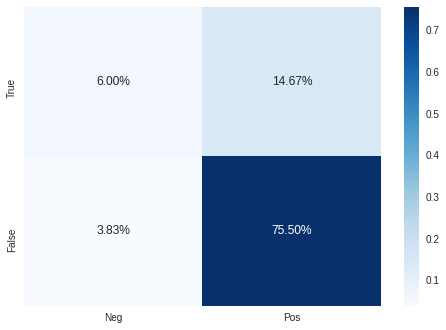

In [362]:
y_ticks = ['True', 'False']
x_ticks = ['Neg', 'Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%', cmap='Blues', xticklabels=x_ticks, yticklabels=y_ticks)

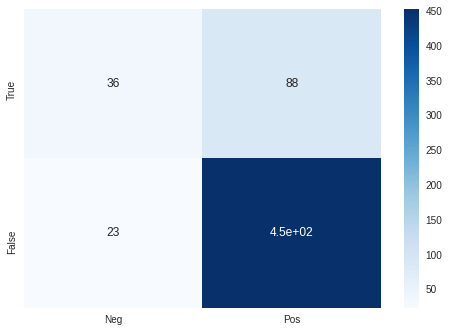

In [363]:
y_ticks = ['True', 'False']
x_ticks = ['Neg', 'Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=True, cmap='Blues', xticklabels=x_ticks, yticklabels=y_ticks)

After further inspection, I believe that I should try and get more reviews to fill in the negative class, as it is severely underepresented.